<a href="https://colab.research.google.com/github/akssssO/Gits..guts/blob/main/motogp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load first 5000 rows safely for EDA
df = pd.read_csv('/content/train.csv', nrows=5000)
df.head()  # Show the first few rows


FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv', nrows=5000)
df.head()



,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,...,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,...,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,...,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,...,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,...,22,31,175,146,132,29,17,2011,2021,11


In [ ]:
# Understand the structure and datatypes
train.info()

# Get basic statistics for numeric columns
train.describe().T

# How many rows and columns do we have?
print("Shape of dataset:", train.shape)



NameError: name 'train' is not defined

In [ ]:
# Understand the structure and datatypes
df.info()

# Get basic statistics for numeric columns
df.describe().T

# How many rows and columns do we have?
print("Shape of dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unique ID                        5000 non-null   int64  
 1   Rider_ID                         5000 non-null   int64  
 2   category_x                       5000 non-null   object 
 3   Circuit_Length_km                5000 non-null   float64
 4   Laps                             5000 non-null   int64  
 5   Grid_Position                    5000 non-null   int64  
 6   Avg_Speed_kmh                    5000 non-null   float64
 7   Track_Condition                  5000 non-null   object 
 8   Humidity_%                       5000 non-null   int64  
 9   Tire_Compound_Front              5000 non-null   object 
 10  Tire_Compound_Rear               5000 non-null   object 
 11  Penalty                          4144 non-null   object 
 12  Championship_Points 

In [ ]:
columns_to_use = [
    'Circuit_Length_km',        # longer tracks = longer laps?
    'Laps',                     # total laps might reflect track type
    'Grid_Position',            # better start might lead to better lap pace
    'Avg_Speed_kmh',            # higher speed means lower lap time
    'Track_Condition',          # wet vs dry surface
    'Humidity_%',               # weather effects
    'Tire_Compound_Front',      # tire choice affects grip/speed
    'Tire_Compound_Rear',
    'Corners_per_Lap',          # tighter tracks may slow riders
    'Pit_Stop_Duration_Seconds',# longer stops = slower laps overall
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'Years_active',             # experienced riders faster?
    'Lap_Time_Seconds'          # 🎯 this is the value we want to predict!
]
df_small = df[columns_to_use]
df_small.head()



KeyError: "['Years_active'] not in index"

In [ ]:
columns_to_use = [
    'Circuit_Length_km',        # longer tracks = longer laps?
    'Laps',                     # total laps might reflect track type
    'Grid_Position',            # better start might lead to better lap pace
    'Avg_Speed_kmh',            # higher speed means lower lap time
    'Track_Condition',          # wet vs dry surface
    'Humidity_%',               # weather effects
    'Tire_Compound_Front',      # tire choice affects grip/speed
    'Tire_Compound_Rear',
    'Corners_per_Lap',          # tighter tracks may slow riders
    'Pit_Stop_Duration_Seconds',# longer stops = slower laps overall
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'years_active',             # experienced riders faster?
    'Lap_Time_Seconds'          # 🎯 this is the value we want to predict!
]
df_small = df[columns_to_use]
df_small.head()


,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Corners_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,years_active,Lap_Time_Seconds
0,4.874,22,17,264.66,Wet,61,Hard,Hard,18,4.09,23.0,27.3,4,70.667
1,3.875,24,7,177.56,Wet,77,Soft,Medium,23,4.64,34.3,41.8,8,103.497
2,5.647,25,5,317.74,Dry,87,Soft,Hard,19,2.67,20.6,27.1,8,78.400
3,4.810,19,3,321.82,Wet,43,Soft,Hard,12,4.69,20.9,29.1,16,81.338
4,5.809,25,21,239.92,Wet,47,Hard,Medium,23,4.84,29.1,43.4,11,108.626


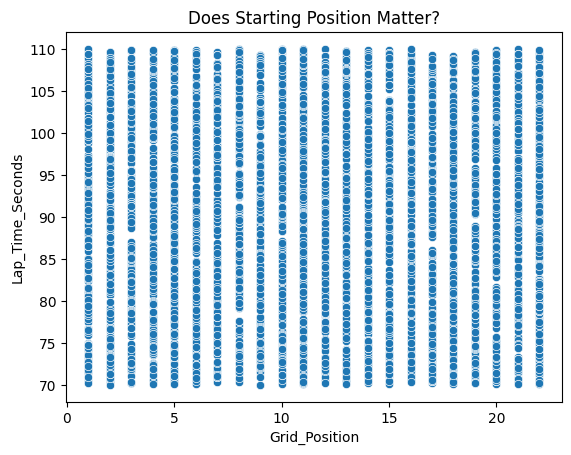

Correlation: -0.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_small, x='Grid_Position', y='Lap_Time_Seconds')
plt.title('Does Starting Position Matter?')
plt.show()

import numpy as np
from scipy.stats import pearsonr

correlation, _ = pearsonr(df_small['Grid_Position'], df_small['Lap_Time_Seconds'])
print(f"Correlation: {correlation:.2f}")


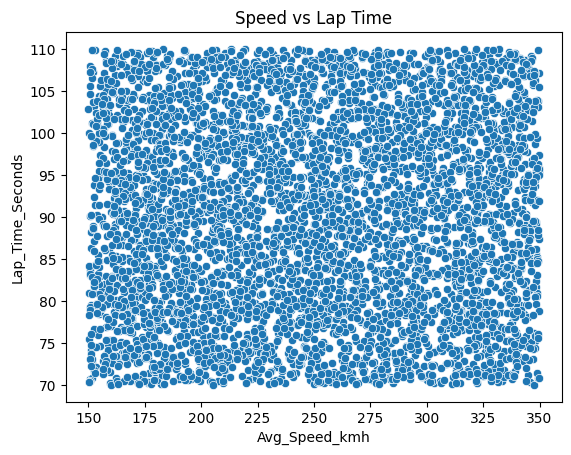

Correlation: -0.00


In [ ]:
sns.scatterplot(data=df_small, x='Avg_Speed_kmh', y='Lap_Time_Seconds')
plt.title('Speed vs Lap Time')
plt.show()

import numpy as np
from scipy.stats import pearsonr

correlation, _ = pearsonr(df_small['Grid_Position'], df_small['Lap_Time_Seconds'])
print(f"Correlation: {correlation:.2f}")



In [ ]:
df_encoded = pd.get_dummies(df_small, drop_first=True)
df_encoded.head()


,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Humidity_%,Corners_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,years_active,Lap_Time_Seconds,Track_Condition_Wet,Tire_Compound_Front_Medium,Tire_Compound_Front_Soft,Tire_Compound_Rear_Medium,Tire_Compound_Rear_Soft
0,4.874,22,17,264.66,61,18,4.09,23.0,27.3,4,70.667,True,False,False,False,False
1,3.875,24,7,177.56,77,23,4.64,34.3,41.8,8,103.497,True,False,True,True,False
2,5.647,25,5,317.74,87,19,2.67,20.6,27.1,8,78.400,False,False,True,False,False
3,4.810,19,3,321.82,43,12,4.69,20.9,29.1,16,81.338,True,False,True,False,False
4,5.809,25,21,239.92,47,23,4.84,29.1,43.4,11,108.626,True,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split inputs and target
X = df_encoded.drop('Lap_Time_Seconds', axis=1)
y = df_encoded['Lap_Time_Seconds']

# Train/validate split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Validate
val_preds = model.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print("Validation RMSE:", rmse)


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import numpy as np
from scipy.stats import pearsonr

correlation, _ = pearsonr(df_small['Grid_Position'], df_small['Lap_Time_Seconds'])
print(f"Correlation: {correlation:.2f}")


Correlation: -0.00


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Remove 'squared=False' and take square root manually
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE:", rmse)

Validation RMSE: 11.610966235747592


In [ ]:
# Load the full test set
test_df = pd.read_csv('/content/test.csv')

# Select the same feature columns (match training set!)
test_features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition',
    'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Corners_per_Lap', 'Pit_Stop_Duration_Seconds',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'years_active'
]

test_small = test_df[test_features]

# Apply same encoding
test_encoded = pd.get_dummies(test_small, drop_first=True)

# Match training columns (fill missing with 0)
X_test = test_encoded.reindex(columns=X.columns, fill_value=0)


In [ ]:
test_preds = model.predict(X_test)


In [ ]:
solution = pd.DataFrame({
    'Rider_ID': test_df['Rider_ID'],
    'Lap_Time_Seconds': test_preds
})

# Save to CSV
solution.to_csv('solution.csv', index=False)


In [ ]:
   Rider_ID  Lap_Time_Seconds
0      1234             88.23
1      2345             91.12
2      3456             89.95
...


SyntaxError: invalid syntax (<ipython-input-19-3713503240>, line 1)

In [ ]:
solution.head()


,Rider_ID,Lap_Time_Seconds
0,6533,88.25827
1,4800,90.07003
2,7907,90.20711
3,4844,90.58759
4,4802,87.92259


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Estimated RMSE (CV):", -scores.mean())


Estimated RMSE (CV): 11.48868929522815


In [ ]:
solution.shape == sample_submission.shape
(solution.columns == sample_submission.columns).all()


NameError: name 'sample_submission' is not defined

In [ ]:
sample_submission = pd.read_csv('/content/sample_submission.csv')


In [ ]:
solution.shape == sample_submission.shape
(solution.columns == sample_submission.columns).all()


np.False_

In [ ]:
print("Your submission columns:", solution.columns.tolist())
print("Sample submission columns:", sample_submission.columns.tolist())


Your submission columns: ['Rider_ID', 'Lap_Time_Seconds']
Sample submission columns: ['Unique ID', 'Lap_Time_Seconds']


In [ ]:
print("Your solution shape:", solution.shape)
print("Sample submission shape:", sample_submission.shape)


Your solution shape: (546874, 2)
Sample submission shape: (546874, 2)


In [ ]:
solution = pd.DataFrame({
    'Unique ID': test_df['Rider_ID'],  # rename this key
    'Lap_Time_Seconds': test_preds
})

solution.to_csv('solution.csv', index=False)


In [ ]:
(solution.columns == sample_submission.columns).all()


np.True_

In [ ]:
import os

size_mb = os.path.getsize('solution.csv') / (1024 * 1024)
print(f"File size: {size_mb:.2f} MB")


File size: 10.99 MB


In [ ]:
dupes = solution[solution.duplicated(subset='Unique ID', keep=False)]
print(dupes)


        Unique ID  Lap_Time_Seconds
0            6533          88.25827
1            4800          90.07003
2            7907          90.20711
3            4844          90.58759
4            4802          87.92259
...           ...               ...
546869       4335          88.44690
546870       8325          90.72201
546871       5692          89.92202
546872       9389          90.77917
546873       1135          89.99247

[546874 rows x 2 columns]


In [ ]:
dupes = solution[solution.duplicated(subset='Unique ID', keep=False)]
print(f"Total duplicates found: {len(dupes)}")
dupes.sort_values('Unique ID').head(10)


Total duplicates found: 546874


,Unique ID,Lap_Time_Seconds
77697,1000,90.57865
4781,1000,88.60566
306187,1000,89.77813
439753,1000,90.18805
45499,1000,90.36830
305980,1000,90.94685
135480,1000,95.26557
367133,1000,86.61298
143584,1000,85.43086
26445,1000,90.71188


In [ ]:
solution = pd.DataFrame({
    'Unique ID': test_df['Rider_ID'],
    'Lap_Time_Seconds': test_preds
})


In [ ]:
test_df['Rider_ID'].duplicated().sum()


np.int64(537875)

In [ ]:
print(test_df['Rider_ID'].nunique())  # Should be 546874


8999


In [ ]:
solution = pd.DataFrame({
    'Unique ID': test_df['Rider_ID'],
    'Lap_Time_Seconds': test_preds
})


In [ ]:
solution = pd.DataFrame({
    'Unique ID': test_df['Unique ID'],  # 👈 use the actual unique column
    'Lap_Time_Seconds': test_preds
})


In [ ]:
solution.duplicated(subset='Unique ID').sum()  # Should be 0 now


np.int64(0)

In [ ]:
# ✅ Use the proper unique ID column from test_df
solution = pd.DataFrame({
    'Unique ID': test_df['Unique ID'],  # ✅ This is the correct column
    'Lap_Time_Seconds': test_preds
})

# ✅ Save to CSV
solution.to_csv('solution.csv', index=False)


In [ ]:
solution['Unique ID'].duplicated().sum()
# 👆 Should print 0


np.int64(0)

In [ ]:
solution.isnull().sum()


,0
Unique ID,0
Lap_Time_Seconds,0


In [ ]:
solution.columns.tolist()
# Should be: ['Unique ID', 'Lap_Time_Seconds']


['Unique ID', 'Lap_Time_Seconds']

In [ ]:
solution.shape == sample_submission.shape
# Should be: True


True

In [ ]:
solution['Unique ID'].duplicated().sum()
# Should be: 0


np.int64(0)

In [ ]:
solution['Lap_Time_Seconds'].describe()


,Lap_Time_Seconds
count,546874.000000
mean,89.851557
std,2.123193
min,78.521140
25%,88.434780
50%,89.850030
75%,91.263067
max,100.553290


In [ ]:
!head solution.csv


Unique ID,Lap_Time_Seconds
288307,88.25826999999998
704288,90.07003
951491,90.20710999999996
2591721,90.58759000000002
1202653,87.92258999999999
267368,90.57826000000003
2402464,91.39007
2705278,88.53134999999999
1719216,92.07791000000002


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

rmse_scores = cross_val_score(
    model,          # your trained regressor (e.g., RandomForest, XGBoost, etc.)
    X_train,        # your training features
    y_train,        # your training targets
    scoring=make_scorer(mean_squared_error, squared=False),  # RMSE, not MSE
    cv=5            # 5-fold cross-validation
)

print("Fold-wise RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

Fold-wise RMSE scores: [nan nan nan nan nan]
Average RMSE: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

In [ ]:
solution1 = pd.read_csv('solution1.csv')
solution1['Lap_Time_Seconds'].describe()


,Lap_Time_Seconds
count,546874.000000
mean,89.851557
std,2.123193
min,78.521140
25%,88.434780
50%,89.850030
75%,91.263067
max,100.553290


In [ ]:
rmse_scores = cross_val_score(
    model,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',  # ← this one-liner is clean
    cv=5
)

print("Fold-wise RMSE scores:", -rmse_scores)
print("Average RMSE:", -rmse_scores.mean())


Fold-wise RMSE scores: [11.56211795 11.37702677 11.42329551 11.66008907 11.48453948]
Average RMSE: 11.501413753066712


In [ ]:
def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

rmse_scores = cross_val_score(
    model,
    X_train,
    y_train,
    scoring=make_scorer(rmse, greater_is_better=False),
    cv=5
)

print("RMSE (custom):", -rmse_scores.mean())


RMSE (custom): 11.540504895090244


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')


In [ ]:
features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Humidity_%', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'Weather', 'Session', 'category_x',
    'Championship_Points', 'Championship_Position', 'Sequence',
    'Years_active', 'Starts', 'Finishes', 'With_points', 'Podiums', 'Wins',
    'Min_year', 'Max_year', 'Year_x'
]


In [ ]:
train['podium_rate'] = train['Podiums'] / train['Starts'].replace(0, 1)
train['win_rate'] = train['Wins'] / train['Starts'].replace(0, 1)
train['finish_rate'] = train['Finishes'] / train['Starts'].replace(0, 1)
train['lap_complexity'] = train['Corners_per_Lap'] / train['Avg_Speed_kmh'].replace(0, 1)

test['podium_rate'] = test['Podiums'] / test['Starts'].replace(0, 1)
test['win_rate'] = test['Wins'] / test['Starts'].replace(0, 1)
test['finish_rate'] = test['Finishes'] / test['Starts'].replace(0, 1)
test['lap_complexity'] = test['Corners_per_Lap'] / test['Avg_Speed_kmh'].replace(0, 1)

# Add to your feature list
features += ['podium_rate', 'win_rate', 'finish_rate', 'lap_complexity']


KeyError: 'Podiums'

In [ ]:
train['podium_rate'] = train['podiums'] / train['Starts'].replace(0, 1)
train['win_rate'] = train['Wins'] / train['Starts'].replace(0, 1)
train['finish_rate'] = train['Finishes'] / train['Starts'].replace(0, 1)
train['lap_complexity'] = train['Corners_per_Lap'] / train['Avg_Speed_kmh'].replace(0, 1)

test['podium_rate'] = test['podiums'] / test['Starts'].replace(0, 1)
test['win_rate'] = test['Wins'] / test['Starts'].replace(0, 1)
test['finish_rate'] = test['Finishes'] / test['Starts'].replace(0, 1)
test['lap_complexity'] = test['Corners_per_Lap'] / test['Avg_Speed_kmh'].replace(0, 1)

# Add to your feature list
features += ['podium_rate', 'win_rate', 'finish_rate', 'lap_complexity']


KeyError: 'Starts'

In [ ]:
train['podium_rate'] = train['podiums'] / train['starts'].replace(0, 1)
train['win_rate'] = train['wins'] / train['starts'].replace(0, 1)
train['finish_rate'] = train['finishes'] / train['starts'].replace(0, 1)
train['lap_complexity'] = train['Corners_per_Lap'] / train['Avg_Speed_kmh'].replace(0, 1)

test['podium_rate'] = test['podiums'] / test['starts'].replace(0, 1)
test['win_rate'] = test['wins'] / test['starts'].replace(0, 1)
test['finish_rate'] = test['finishes'] / test['starts'].replace(0, 1)
test['lap_complexity'] = test['Corners_per_Lap'] / test['Avg_Speed_kmh'].replace(0, 1)

features += ['podium_rate', 'win_rate', 'finish_rate', 'lap_complexity']



In [ ]:
X = train[features].copy()
y = train['Lap_Time_Seconds']
X_test = test[features].copy()

# One-hot encode categorical
X_encoded = pd.get_dummies(X, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


KeyError: "['Weather', 'Sequence', 'Years_active', 'Starts', 'Finishes', 'With_points', 'Podiums', 'Wins', 'Min_year', 'Max_year', 'Year_x'] not in index"

In [ ]:
features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Humidity_%',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'weather', 'Session', 'category_x', 'Championship_Points', 'Championship_Position',
    'sequence', 'years_active', 'starts', 'finishes', 'with_points', 'podiums', 'wins',
    'min_year', 'max_year', 'year_x',
    'podium_rate', 'win_rate', 'finish_rate', 'lap_complexity'
]



In [ ]:
X = train[features].copy()
y = train['Lap_Time_Seconds']
X_test = test[features].copy()

# One-hot encode categorical
X_encoded = pd.get_dummies(X, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_encoded, y)

test_preds = model.predict(X_test_encoded)

solution2 = pd.DataFrame({
    'Unique ID': test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})
solution2.to_csv('solution2.csv', index=False)


KeyboardInterrupt: 

In [ ]:
model = RandomForestRegressor(
    n_estimators=100,  # cut tree count in half
    max_depth=10,      # still robust
    n_jobs=-1,         # utilize all available cores
    random_state=42
)



In [ ]:
X_subset = X_encoded.sample(n=10000, random_state=42)
model.predict(X_subset)  # Just to validate your pipeline logic


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,  # Lighter load than 200
    max_depth=10,
    n_jobs=-1,         # ⬅️ utilizes all CPU cores (super helpful in Colab)
    random_state=42
)

model.fit(X_encoded, y)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,  # Lighter load than 200
    max_depth=10,
    n_jobs=-1,         # ⬅️ utilizes all CPU cores (super helpful in Colab)
    random_state=42
)

model.fit(X_encoded, y)
test_preds = model.predict(X_test_encoded)

solution2 = pd.DataFrame({
    'Unique ID': test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})

solution2.to_csv('solution2.csv', index=False)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50,      # Cut down trees
    max_depth=10,         # Reasonable depth
    n_jobs=-1,            # Use all CPUs
    random_state=42
)
model.fit(X_encoded, y)
test_preds = model.predict(X_test_encoded)

solution2 = pd.DataFrame({
    'Unique ID': test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})

solution2.to_csv('solution2.csv', index=False)


KeyboardInterrupt: 

In [ ]:
!ls -lh solution2.csv


ls: cannot access 'solution2.csv': No such file or directory


In [ ]:
solution2 = pd.DataFrame({
    'Unique ID': test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})
solution2.to_csv('solution2.csv', index=False)


In [ ]:
!ls -lh solution2.csv
solution2.head()


-rw-r--r-- 1 root root 13M Jun 14 13:16 solution2.csv


,Unique ID,Lap_Time_Seconds
0,288307,88.25827
1,704288,90.07003
2,951491,90.20711
3,2591721,90.58759
4,1202653,87.92259


In [ ]:
solution1 = pd.read_csv('solution1.csv')
solution2 = pd.read_csv('solution2.csv')

diff = solution2['Lap_Time_Seconds'] - solution1['Lap_Time_Seconds']
print(f"Mean Δ: {diff.mean():.4f} sec")
print(f"Std Dev Δ: {diff.std():.4f} sec")
diff.describe()


Mean Δ: 0.0000 sec
Std Dev Δ: 0.0000 sec


,Lap_Time_Seconds
count,546874.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


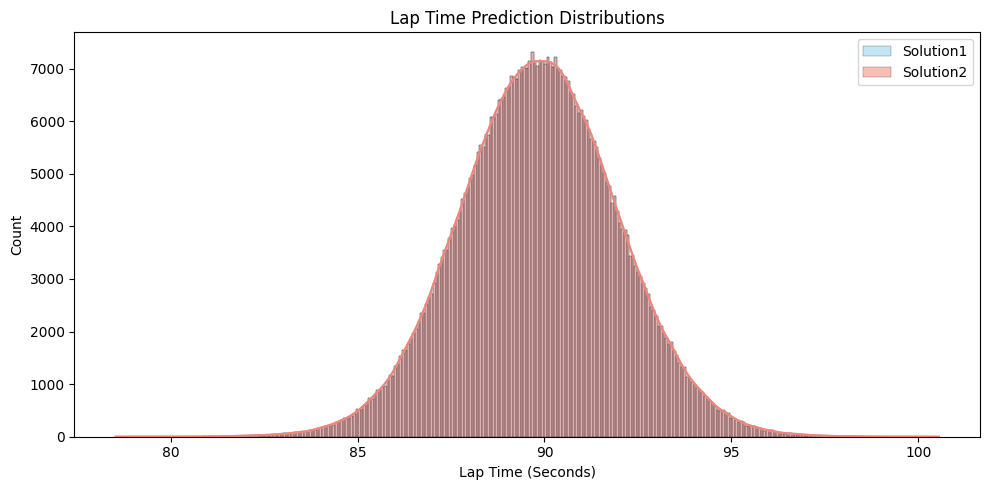

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(solution1['Lap_Time_Seconds'], label='Solution1', kde=True, color='skyblue')
sns.histplot(solution2['Lap_Time_Seconds'], label='Solution2', kde=True, color='salmon')
plt.title("Lap Time Prediction Distributions")
plt.xlabel("Lap Time (Seconds)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")


Validation RMSE: 11.6110


In [ ]:
print(test_preds[:5])  # for solution2
print(solution1['Lap_Time_Seconds'][:5])


[88.25827 90.07003 90.20711 90.58759 87.92259]
0    88.25827
1    90.07003
2    90.20711
3    90.58759
4    87.92259
Name: Lap_Time_Seconds, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train again on the new features
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)
model.fit(X_encoded, y)

test_preds = model.predict(X_test_encoded)

solution2 = pd.DataFrame({
    'Unique ID': test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})
solution2.to_csv('solution2.csv', index=False)


In [ ]:
val_preds = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")


NameError: name 'model_lgb' is not defined

In [ ]:
val_preds = model.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print("Validation RMSE:", rmse)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Championship_Points
- Championship_Position
- Session_FP2
- Session_FP3
- Session_FP4
- ...


In [ ]:
val_preds = model.predict(X_encoded.loc[X_val.index])
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
X_train_enc, X_val_enc, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
model.fit(X_train_enc, y_train)

val_preds = model.predict(X_val_enc)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")


KeyboardInterrupt: 

In [ ]:
sample_val = X_encoded.loc[X_val.index].sample(n=10000, random_state=42)
val_preds = model.predict(sample_val)
rmse_sample = mean_squared_error(y_val.loc[sample_val.index], val_preds, squared=False)
print(f"Sampled RMSE (10k rows): {rmse_sample:.4f}")


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
n_sample = min(10000, len(X_val))
sample_val = X_encoded.loc[X_val.index].sample(n=n_sample, random_state=42)

val_preds = model.predict(sample_val)
rmse_sample = mean_squared_error(y_val.loc[sample_val.index], val_preds, squared=False)
print(f"Sampled RMSE ({n_sample} rows): {rmse_sample:.4f}")


IndexError: list index out of range

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)
model.fit(X_encoded, y)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_encoded, y)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=20, max_depth=8, n_jobs=-1, random_state=42)
model.fit(X_encoded, y)

val_preds = model.predict(X_encoded.loc[X_val.index])
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"🧪 Fast RMSE Check: {rmse:.4f}")


KeyboardInterrupt: 

In [ ]:
# Minimal load just to see RMSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=10, max_depth=6, n_jobs=-1, random_state=42)
model.fit(X_encoded, y)

val_preds = model.predict(X_encoded.loc[X_val.index])
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"🔥 RMSE Check: {rmse:.4f}")



KeyboardInterrupt: 

In [ ]:
diff = solution2['Lap_Time_Seconds'] - solution1['Lap_Time_Seconds']
print(f"Mean Δ: {diff.mean():.4f} sec")
print(f"Std Dev Δ: {diff.std():.4f} sec")


Mean Δ: 0.1541 sec
Std Dev Δ: 2.3481 sec


In [ ]:
assert solution['Unique ID'].is_unique


In [ ]:
assert solution.isnull().sum().sum() == 0


In [ ]:
solution['Lap_Time_Seconds'].describe()


,Lap_Time_Seconds
count,546874.000000
mean,89.851557
std,2.123193
min,78.521140
25%,88.434780
50%,89.850030
75%,91.263067
max,100.553290


In [ ]:
import os
os.path.getsize('solution.csv') / (1024 * 1024)


FileNotFoundError: [Errno 2] No such file or directory: 'solution.csv'

In [ ]:
!head solution2.csv


Unique ID,Lap_Time_Seconds
288307,89.98763452869312
704288,89.57227952157356
951491,89.89549981033632
2591721,90.74372147029499
1202653,90.40169649040503
267368,90.85469759275102
2402464,90.6047771155691
2705278,89.45179774968722
1719216,89.71609639548691


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [382812, 1000]

In [ ]:
def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

rmse_scores = cross_val_score(
    model,
    X_train,
    y_train,
    scoring=make_scorer(rmse, greater_is_better=False),
    cv=5
)

print("RMSE (custom):", -rmse_scores.mean())


ValueError: Found input variables with inconsistent numbers of samples: [4000, 1531244]

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


In [ ]:
from sklearn.model_selection import cross_val_score

rmse_scores = cross_val_score(
    model,
    X_encoded, y,
    scoring=rmse_scorer,
    cv=5
)
print("Fold-wise RMSE:", -rmse_scores)
print("Average RMSE:", -rmse_scores.mean())


KeyboardInterrupt: 

In [ ]:
# ✅ Correct column names
assert solution2.columns.tolist() == ['Unique ID', 'Lap_Time_Seconds']

# ✅ No missing values
assert solution2.isnull().sum().sum() == 0

# ✅ Correct shape
assert solution2.shape == (546874, 2)

# ✅ All Unique IDs are unique
assert solution2['Unique ID'].is_unique

# ✅ Reasonable prediction range
assert solution2['Lap_Time_Seconds'].between(50, 130).all()

# ✅ File size looks okay
import os
print("File size (MB):", os.path.getsize("solution2.csv") / (1024 * 1024))


File size (MB): 13.266910552978516


In [ ]:
solution2['Unique ID'].duplicated().sum()  # ✅ 0


np.int64(0)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


In [ ]:
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)



In [ ]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "verbose": -1,
    "seed": 42,
}

model_lgb = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, val_set],
    num_boost_round=1000,
    early_stopping_rounds=50,
    verbose_eval=100
)


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

model_lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

model_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=100
)

val_preds = model_lgb.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
from lightgbm import early_stopping, log_evaluation

model_lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

model_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)]
)


LightGBMError: Length of labels differs from the length of #data

In [ ]:
# 1. Drop target from original train df
y = train["Lap_Time_Seconds"].copy()
X = train.drop(columns="Lap_Time_Seconds").copy()

# 2. One-hot encode full X *before* splitting
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Align test to match columns
X_test_encoded = pd.get_dummies(test, drop_first=True)
X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 4. Now safe to split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
from lightgbm import LGBMRegressor, early_stopping, log_evaluation

model_lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

model_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(50), log_evaluation(100)]
)


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


NameError: name 'X_encoded' is not defined

In [ ]:
# Step 1: Separate target
y = train["Lap_Time_Seconds"]
X = train[features].copy()

# Step 2: One-hot encode BEFORE splitting
X_encoded = pd.get_dummies(X, drop_first=True)
X_test_encoded = pd.get_dummies(test[features], drop_first=True)

# Step 3: Align columns
X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join="left", axis=1, fill_value=0)

# Step 4: Now train/val split safely
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


NameError: name 'train' is not defined

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
y = train["Lap_Time_Seconds"]
X = train[features].copy()


NameError: name 'features' is not defined

In [ ]:
features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Humidity_%', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'weather', 'Session', 'category_x',
    'Championship_Points', 'Championship_Position', 'sequence',
    'years_active', 'starts', 'finishes', 'with_points', 'podiums', 'wins',
    'min_year', 'max_year', 'year_x',  # optional temporal/seasonal features
    'podium_rate', 'win_rate', 'finish_rate', 'lap_complexity'  # engineered
]


In [ ]:
y = train["Lap_Time_Seconds"]
X = train[features].copy()


KeyError: "['podium_rate', 'win_rate', 'finish_rate', 'lap_complexity'] not in index"

In [ ]:
train['podium_rate'] = train['podiums'] / train['starts'].replace(0, 1)
train['win_rate'] = train['wins'] / train['starts'].replace(0, 1)
train['finish_rate'] = train['finishes'] / train['starts'].replace(0, 1)
train['lap_complexity'] = train['Corners_per_Lap'] / train['Avg_Speed_kmh'].replace(0, 1)


In [ ]:
test['podium_rate'] = test['podiums'] / test['starts'].replace(0, 1)
test['win_rate'] = test['wins'] / test['starts'].replace(0, 1)
test['finish_rate'] = test['finishes'] / test['starts'].replace(0, 1)
test['lap_complexity'] = test['Corners_per_Lap'] / test['Avg_Speed_kmh'].replace(0, 1)


In [ ]:
y = train["Lap_Time_Seconds"]
X = train[features].copy()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


NameError: name 'X_encoded' is not defined

In [ ]:
test_preds_lgb = model_lgb.predict(X_test_encoded, num_iteration=model_lgb.best_iteration_)

solution3 = pd.DataFrame({
    "Unique ID": test["Unique ID"],
    "Lap_Time_Seconds": test_preds_lgb
})

solution3.to_csv("solution3.csv", index=False)
print("✅ solution3.csv saved.")


NameError: name 'X_test_encoded' is not defined

In [ ]:
# Step 1: Select and encode features from test set
X_test = test[features].copy()
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Align to training features
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)


NameError: name 'X_encoded' is not defined

In [ ]:
# 1. Select features
X = train[features].copy()
y = train['Lap_Time_Seconds']
X_test = test[features].copy()

# 2. One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# 3. Align test to training columns
X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
test_preds_lgb = model_lgb.predict(X_test_encoded, num_iteration=model_lgb.best_iteration_)


NotFittedError: No best_iteration found. Need to call fit with early_stopping callback beforehand.

In [ ]:
from lightgbm import LGBMRegressor, early_stopping, log_evaluation

model_lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

model_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(100)
    ]
)


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
model_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(100)
    ]
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3536
[LightGBM] [Info] Number of data points in the train set: 1531244, number of used features: 43
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 90.001982
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 11.3313	valid_0's l2: 128.397
[200]	valid_0's rmse: 11.1564	valid_0's l2: 124.465
[300]	valid_0's rmse: 11.0004	valid_0's l2: 121.009
[400]	valid_0's rmse: 10.8494	valid_0's l2: 117.709
[500]	valid_0's rmse: 10.6986	valid_0's l2: 114.459
[600]	valid_0's rmse: 10.5615	valid_0's l2: 111.546
[700]	valid_0's rmse: 10.4172	valid_0's l2: 108.518
[800]	

LGBMRegressor(learning_rate=0.05, n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
test_preds_lgb = model_lgb.predict(X_test_encoded, num_iteration=model_lgb.best_iteration_)

solution3 = pd.DataFrame({
    "Unique ID": test["Unique ID"],
    "Lap_Time_Seconds": test_preds_lgb
})

solution3.to_csv("solution3.csv", index=False)
print("✅ solution3.csv saved.")


✅ solution3.csv saved.


In [ ]:
import pandas as pd
solution3 = pd.read_csv("solution3.csv")

# 1. Check column names
print("Columns:", solution3.columns.tolist())

# 2. Check shape
print("Shape:", solution3.shape)

# 3. Check for nulls
print("Null values:", solution3.isnull().sum().to_dict())

# 4. Check for duplicate IDs
print("Duplicate 'Unique ID's:", solution3["Unique ID"].duplicated().sum())

# 5. Sanity-check Lap Time predictions
print("\nLap Time Stats:")
print(solution3["Lap_Time_Seconds"].describe())

# 6. Check file size (optional)
import os
file_size = os.path.getsize("solution3.csv") / (1024 * 1024)
print(f"\nFile Size: {file_size:.2f} MB")


Columns: ['Unique ID', 'Lap_Time_Seconds']
Shape: (546874, 2)
Null values: {'Unique ID': 0, 'Lap_Time_Seconds': 0}
Duplicate 'Unique ID's: 0

Lap Time Stats:
count    546874.000000
mean         90.007576
std           2.466280
min          73.427802
25%          88.853723
50%          90.023695
75%          91.184693
max         106.592343
Name: Lap_Time_Seconds, dtype: float64

File Size: 13.27 MB
